In [4]:
import seaborn as sns
import pandas as pd
import numpy as np

### Загружаем датафрейм 

In [22]:
penguins = sns.load_dataset('penguins')
type(penguins)

pandas.core.frame.DataFrame

### 2.1 .head()

In [6]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### 2.2 describe() 

In [7]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### 2.3 считайте значение конкретной ячейки (с конкретным индексом из конкретной колонки) 

In [8]:
#позиция ячейки:
x, y = 0, 0 

penguins.iloc[x, y]

'Adelie'

### 2.4 фильтрация строк по диапазону индекса 

In [9]:
min_index = 10
max_index = 20

penguins.loc[np.logical_and(penguins.index >= min_index, penguins.index <= max_index)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male
15,Adelie,Torgersen,36.6,17.8,185.0,3700.0,Female
16,Adelie,Torgersen,38.7,19.0,195.0,3450.0,Female
17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,Male
18,Adelie,Torgersen,34.4,18.4,184.0,3325.0,Female
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,Male


### 2.5 фильтрация набора данных по какому-либо условию 

In [12]:
condition_value = 45.0
penguins.loc[penguins.bill_length_mm > condition_value]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,Male
73,Adelie,Torgersen,45.8,18.9,197.0,4150.0,Male
111,Adelie,Biscoe,45.6,20.3,191.0,4600.0,Male
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### 2.6 работа с пропущенными значениями (если они есть): удаление строк с пропущенными значениями, заполнение пропущенных значений средним значением по колонке. Если пропущенных значений нет — намеренно их "генерируете", прибивая какие-то куски данных в np.nan 

In [16]:
# значения отсутствуют
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [15]:
#удаление с помощью dropna()
penguins.dropna().isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [25]:
penguins.bill_length_mm = penguins.bill_length_mm.fillna(penguins["bill_length_mm"].mean())
penguins.bill_depth_mm = penguins.bill_depth_mm.fillna(penguins["bill_depth_mm"].mean())
penguins.flipper_length_mm = penguins.flipper_length_mm.fillna(penguins["flipper_length_mm"].mean())
penguins.body_mass_g = penguins.body_mass_g.fillna(penguins["body_mass_g"].mean())
penguins.sex = penguins.sex.fillna("Male")

penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### 2.7 создание нового поля вычисленного на основе значений других полей:

### 2.8 через выражение на базе имеющихся колонок 

In [26]:
penguins["bill_volume_mm"] = penguins["bill_length_mm"] * penguins["bill_depth_mm"]
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_volume_mm
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,731.170000
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,687.300000
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,725.400000
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male,753.312467
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,708.310000
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,Male,753.312467
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,Female,669.240000
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,Male,791.280000
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,Female,668.960000


In [27]:
penguins = penguins.drop(["bill_volume_mm"], axis=1)

### 2.9 через DataFrame.apply 

In [28]:
penguins_bill = penguins[["bill_length_mm", "bill_depth_mm"]]

penguins["bill_volume_mm"] = penguins_bill.apply(lambda x: x["bill_length_mm"] * x["bill_depth_mm"], axis=1)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_volume_mm
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,731.170000
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,687.300000
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,725.400000
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male,753.312467
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,708.310000
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,Male,753.312467
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,Female,669.240000
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,Male,791.280000
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,Female,668.960000


In [29]:
penguins = penguins.drop(["bill_volume_mm"], axis=1)

### 2.10 через Series.apply 

In [30]:
bm_series = penguins.body_mass_g
penguins["body_mass_after_year"] = bm_series.apply(lambda x: x+500.0)

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_after_year
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,4250.000000
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,4300.000000
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,3750.000000
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male,4701.754386
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,3950.000000
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,Male,4701.754386
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,Female,5350.000000
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,Male,6250.000000
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,Female,5700.000000


In [40]:
penguins = penguins.drop(["body_mass_after_year"], axis=1)

### 2.11 сортировка по какому-либо из полей 

In [41]:
penguins.sort_values(by='bill_length_mm')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
142,Adelie,Dream,32.1,15.5,188.0,3050.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
92,Adelie,Dream,34.0,17.1,185.0,3400.0,Female
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,Male
...,...,...,...,...,...,...,...
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female


### 2.12 вычислить несколько статистик по колонкам (используйте встроенные агрегатные функции — любые на выбор) 10. По какому-либо полю / набору полей смотрим число значений с помощью .value_counts() 

In [42]:
penguins.agg({'bill_length_mm' : ['sum', 'min', 'max'], 
          'bill_depth_mm' : ['sum', 'min', 'max'], 
          'flipper_length_mm': ['sum', 'min', 'max'],
          'body_mass_g': ['sum', 'min', 'max']})

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
sum,15109.14386,5900.002339,69114.830409,1.445404e+06
min,32.10000,13.100000,172.000000,2.700000e+03
max,59.60000,21.500000,231.000000,6.300000e+03


### 2.13 Если значений немного — вывод уникальных значений какой-либо колонки через .unique()

In [43]:
penguins.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

### 2.14 Удалите текущий индекс и создайте новый индекс на базе новой колонки, которая для этого лучше всего подходит

In [44]:
penguins.set_index(['species'])

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female
...,...,...,...,...,...,...
Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,Male
Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,Female
Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,Male


### 3. Продемонстрировать работу .groupby, на основе группировок в groupby вычисляете агрегатные функции по одной или нескольким колонкам

In [45]:
penguins.groupby(['species']).mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.825144,18.338495,190.025758,3703.958910
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.475983,14.999606,217.055768,5068.965761


In [46]:
penguins.groupby(['species']).max()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,Torgersen,46.0,21.5,210.0,4775.0,Male
Chinstrap,Dream,58.0,20.8,212.0,4800.0,Male
Gentoo,Biscoe,59.6,17.3,231.0,6300.0,Male


In [47]:
penguins.groupby(['species']).min()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,Biscoe,32.1,15.5,172.000000,2850.0,Female
Chinstrap,Dream,40.9,16.4,178.000000,2700.0,Female
Gentoo,Biscoe,40.9,13.1,200.915205,3950.0,Female


In [48]:
penguins.groupby(['bill_length_mm']).mean()

,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,,,
32.1,15.5,188.0,3050.0
33.1,16.1,178.0,2900.0
33.5,19.0,190.0,3600.0
34.0,17.1,185.0,3400.0
34.1,18.1,193.0,3475.0
...,...,...,...
55.1,16.0,230.0,5850.0
55.8,19.8,207.0,4000.0
55.9,17.0,228.0,5600.0


### 4 Решейпинг данных 1Dto2D с помощью .pivot (можно подать на вход результаты агрегатов, полученных ранее через .groupby (сгруппировать по двум полям), либо прекрасно заходит сюда данные из SQL сгруппированные предварительно по 2-м полям)

In [49]:
penguins.pivot(columns='species', values=['bill_length_mm','bill_depth_mm'])

bill_length_mm                     bill_depth_mm                    
species         Adelie Chinstrap    Gentoo        Adelie Chinstrap    Gentoo
0             39.10000       NaN       NaN      18.70000       NaN       NaN
1             39.50000       NaN       NaN      17.40000       NaN       NaN
2             40.30000       NaN       NaN      18.00000       NaN       NaN
3             43.92193       NaN       NaN      17.15117       NaN       NaN
4             36.70000       NaN       NaN      19.30000       NaN       NaN
..                 ...       ...       ...           ...       ...       ...
339                NaN       NaN  43.92193           NaN       NaN  17.15117
340                NaN       NaN  46.80000           NaN       NaN  14.30000
341                NaN       NaN  50.40000           NaN       NaN  15.70000
342                NaN       NaN  45.20000           NaN       NaN  14.80000
343                NaN       NaN  49.90000           NaN       NaN  16.10000

[344 rows x 6 columns]

### 5 Решейпинг 1Dto2D данных соединённый с группировкой / агрегацией (одним словом — сводная таблица): .pivot_table. Группируем только по категориальным полям или числовым, если уверены, что значений немного! Если значений много, можете вначале из загрубить (см. (2.7.) либо (7)) 

In [52]:
penguins.pivot_table(columns='species', values=['bill_length_mm','bill_depth_mm'], aggfunc=['max', 'mean', 'min'])

max                        mean                        \
species        Adelie Chinstrap Gentoo     Adelie  Chinstrap     Gentoo   
bill_depth_mm    21.5      20.8   17.3  18.338495  18.420588  14.999606   
bill_length_mm   46.0      58.0   59.6  38.825144  48.833824  47.475983   

                  min                   
species        Adelie Chinstrap Gentoo  
bill_depth_mm    15.5      16.4   13.1  
bill_length_mm   32.1      40.9   40.9

### 6 Посчитать квантили распределения какого-либо вещественного признака (с помощью numpy.quantile или numpy.percentile) 

In [53]:
penguins.quantile(.5)

bill_length_mm         44.25
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
Name: 0.5, dtype: float64

In [54]:
#тоже самое, но как я понял ручками надо каждую серию подставлять:
np.quantile(penguins.bill_length_mm, 0.5)

44.25

### 7 Посчитать (в виде текста) гистограмму какого-либо вещественного признака (с помощью numpy.histogram). Значения гистограммы можете использовать как вариант в качестве загрубленного числового признака для заданий (4) или (5).

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

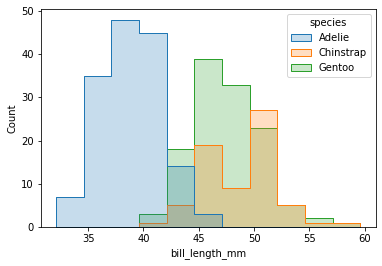

In [56]:
sns.histplot(penguins, x="bill_length_mm", hue="species", element="step")

### 8 Получить DataFrame с MultiIndex любым способом: через конструктор (в документации увидите множество видов конструкторов для создания MultiIndex с нуля), через read_sql / read_csv / read_excel, read_*, через pivot_table, через groupby или иными способами. 

In [61]:
multi = penguins.set_index(['island', 'species', 'sex', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
multi

Empty DataFrame
Columns: []
Index: [(Torgersen, Adelie, Male, 39.1, 18.7, 181.0, 3750.0), (Torgersen, Adelie, Female, 39.5, 17.4, 186.0, 3800.0), (Torgersen, Adelie, Female, 40.3, 18.0, 195.0, 3250.0), (Torgersen, Adelie, Male, 43.9219298245614, 17.151169590643278, 200.91520467836258, 4201.754385964912), (Torgersen, Adelie, Female, 36.7, 19.3, 193.0, 3450.0), (Torgersen, Adelie, Male, 39.3, 20.6, 190.0, 3650.0), (Torgersen, Adelie, Female, 38.9, 17.8, 181.0, 3625.0), (Torgersen, Adelie, Male, 39.2, 19.6, 195.0, 4675.0), (Torgersen, Adelie, Male, 34.1, 18.1, 193.0, 3475.0), (Torgersen, Adelie, Male, 42.0, 20.2, 190.0, 4250.0), (Torgersen, Adelie, Male, 37.8, 17.1, 186.0, 3300.0), (Torgersen, Adelie, Male, 37.8, 17.3, 180.0, 3700.0), (Torgersen, Adelie, Female, 41.1, 17.6, 182.0, 3200.0), (Torgersen, Adelie, Male, 38.6, 21.2, 191.0, 3800.0), (Torgersen, Adelie, Male, 34.6, 21.1, 198.0, 4400.0), (Torgersen, Adelie, Female, 36.6, 17.8, 185.0, 3700.0), (Torgersen, Adelie, Female, 38.7, 19.0, 195.0, 3450.0), (Torgersen, Adelie, Male, 42.5, 20.7, 197.0, 4500.0), (Torgersen, Adelie, Female, 34.4, 18.4, 184.0, 3325.0), (Torgersen, Adelie, Male, 46.0, 21.5, 194.0, 4200.0), (Biscoe, Adelie, Female, 37.8, 18.3, 174.0, 3400.0), (Biscoe, Adelie, Male, 37.7, 18.7, 180.0, 3600.0), (Biscoe, Adelie, Female, 35.9, 19.2, 189.0, 3800.0), (Biscoe, Adelie, Male, 38.2, 18.1, 185.0, 3950.0), (Biscoe, Adelie, Male, 38.8, 17.2, 180.0, 3800.0), (Biscoe, Adelie, Female, 35.3, 18.9, 187.0, 3800.0), (Biscoe, Adelie, Male, 40.6, 18.6, 183.0, 3550.0), (Biscoe, Adelie, Female, 40.5, 17.9, 187.0, 3200.0), (Biscoe, Adelie, Female, 37.9, 18.6, 172.0, 3150.0), (Biscoe, Adelie, Male, 40.5, 18.9, 180.0, 3950.0), (Dream, Adelie, Female, 39.5, 16.7, 178.0, 3250.0), (Dream, Adelie, Male, 37.2, 18.1, 178.0, 3900.0), (Dream, Adelie, Female, 39.5, 17.8, 188.0, 3300.0), (Dream, Adelie, Male, 40.9, 18.9, 184.0, 3900.0), (Dream, Adelie, Female, 36.4, 17.0, 195.0, 3325.0), (Dream, Adelie, Male, 39.2, 21.1, 196.0, 4150.0), (Dream, Adelie, Male, 38.8, 20.0, 190.0, 3950.0), (Dream, Adelie, Female, 42.2, 18.5, 180.0, 3550.0), (Dream, Adelie, Female, 37.6, 19.3, 181.0, 3300.0), (Dream, Adelie, Male, 39.8, 19.1, 184.0, 4650.0), (Dream, Adelie, Female, 36.5, 18.0, 182.0, 3150.0), (Dream, Adelie, Male, 40.8, 18.4, 195.0, 3900.0), (Dream, Adelie, Female, 36.0, 18.5, 186.0, 3100.0), (Dream, Adelie, Male, 44.1, 19.7, 196.0, 4400.0), (Dream, Adelie, Female, 37.0, 16.9, 185.0, 3000.0), (Dream, Adelie, Male, 39.6, 18.8, 190.0, 4600.0), (Dream, Adelie, Male, 41.1, 19.0, 182.0, 3425.0), (Dream, Adelie, Male, 37.5, 18.9, 179.0, 2975.0), (Dream, Adelie, Female, 36.0, 17.9, 190.0, 3450.0), (Dream, Adelie, Male, 42.3, 21.2, 191.0, 4150.0), (Biscoe, Adelie, Female, 39.6, 17.7, 186.0, 3500.0), (Biscoe, Adelie, Male, 40.1, 18.9, 188.0, 4300.0), (Biscoe, Adelie, Female, 35.0, 17.9, 190.0, 3450.0), (Biscoe, Adelie, Male, 42.0, 19.5, 200.0, 4050.0), (Biscoe, Adelie, Female, 34.5, 18.1, 187.0, 2900.0), (Biscoe, Adelie, Male, 41.4, 18.6, 191.0, 3700.0), (Biscoe, Adelie, Female, 39.0, 17.5, 186.0, 3550.0), (Biscoe, Adelie, Male, 40.6, 18.8, 193.0, 3800.0), (Biscoe, Adelie, Female, 36.5, 16.6, 181.0, 2850.0), (Biscoe, Adelie, Male, 37.6, 19.1, 194.0, 3750.0), (Biscoe, Adelie, Female, 35.7, 16.9, 185.0, 3150.0), (Biscoe, Adelie, Male, 41.3, 21.1, 195.0, 4400.0), (Biscoe, Adelie, Female, 37.6, 17.0, 185.0, 3600.0), (Biscoe, Adelie, Male, 41.1, 18.2, 192.0, 4050.0), (Biscoe, Adelie, Female, 36.4, 17.1, 184.0, 2850.0), (Biscoe, Adelie, Male, 41.6, 18.0, 192.0, 3950.0), (Biscoe, Adelie, Female, 35.5, 16.2, 195.0, 3350.0), (Biscoe, Adelie, Male, 41.1, 19.1, 188.0, 4100.0), (Torgersen, Adelie, Female, 35.9, 16.6, 190.0, 3050.0), (Torgersen, Adelie, Male, 41.8, 19.4, 198.0, 4450.0), (Torgersen, Adelie, Female, 33.5, 19.0, 190.0, 3600.0), (Torgersen, Adelie, Male, 39.7, 18.4, 190.0, 3900.0), (Torgersen, Adelie, Female, 39.6, 17.2, 196.0, 3550.0), (Torgersen, Adelie, Male, 45.8, 18.9, 197.0, 4150.0), (Torgersen, Ad

### 8.1 Переставить местами уровни индекса 

In [62]:
multi.swaplevel(1,2)

Empty DataFrame
Columns: []
Index: [(Torgersen, Male, Adelie, 39.1, 18.7, 181.0, 3750.0), (Torgersen, Female, Adelie, 39.5, 17.4, 186.0, 3800.0), (Torgersen, Female, Adelie, 40.3, 18.0, 195.0, 3250.0), (Torgersen, Male, Adelie, 43.9219298245614, 17.151169590643278, 200.91520467836258, 4201.754385964912), (Torgersen, Female, Adelie, 36.7, 19.3, 193.0, 3450.0), (Torgersen, Male, Adelie, 39.3, 20.6, 190.0, 3650.0), (Torgersen, Female, Adelie, 38.9, 17.8, 181.0, 3625.0), (Torgersen, Male, Adelie, 39.2, 19.6, 195.0, 4675.0), (Torgersen, Male, Adelie, 34.1, 18.1, 193.0, 3475.0), (Torgersen, Male, Adelie, 42.0, 20.2, 190.0, 4250.0), (Torgersen, Male, Adelie, 37.8, 17.1, 186.0, 3300.0), (Torgersen, Male, Adelie, 37.8, 17.3, 180.0, 3700.0), (Torgersen, Female, Adelie, 41.1, 17.6, 182.0, 3200.0), (Torgersen, Male, Adelie, 38.6, 21.2, 191.0, 3800.0), (Torgersen, Male, Adelie, 34.6, 21.1, 198.0, 4400.0), (Torgersen, Female, Adelie, 36.6, 17.8, 185.0, 3700.0), (Torgersen, Female, Adelie, 38.7, 19.0, 195.0, 3450.0), (Torgersen, Male, Adelie, 42.5, 20.7, 197.0, 4500.0), (Torgersen, Female, Adelie, 34.4, 18.4, 184.0, 3325.0), (Torgersen, Male, Adelie, 46.0, 21.5, 194.0, 4200.0), (Biscoe, Female, Adelie, 37.8, 18.3, 174.0, 3400.0), (Biscoe, Male, Adelie, 37.7, 18.7, 180.0, 3600.0), (Biscoe, Female, Adelie, 35.9, 19.2, 189.0, 3800.0), (Biscoe, Male, Adelie, 38.2, 18.1, 185.0, 3950.0), (Biscoe, Male, Adelie, 38.8, 17.2, 180.0, 3800.0), (Biscoe, Female, Adelie, 35.3, 18.9, 187.0, 3800.0), (Biscoe, Male, Adelie, 40.6, 18.6, 183.0, 3550.0), (Biscoe, Female, Adelie, 40.5, 17.9, 187.0, 3200.0), (Biscoe, Female, Adelie, 37.9, 18.6, 172.0, 3150.0), (Biscoe, Male, Adelie, 40.5, 18.9, 180.0, 3950.0), (Dream, Female, Adelie, 39.5, 16.7, 178.0, 3250.0), (Dream, Male, Adelie, 37.2, 18.1, 178.0, 3900.0), (Dream, Female, Adelie, 39.5, 17.8, 188.0, 3300.0), (Dream, Male, Adelie, 40.9, 18.9, 184.0, 3900.0), (Dream, Female, Adelie, 36.4, 17.0, 195.0, 3325.0), (Dream, Male, Adelie, 39.2, 21.1, 196.0, 4150.0), (Dream, Male, Adelie, 38.8, 20.0, 190.0, 3950.0), (Dream, Female, Adelie, 42.2, 18.5, 180.0, 3550.0), (Dream, Female, Adelie, 37.6, 19.3, 181.0, 3300.0), (Dream, Male, Adelie, 39.8, 19.1, 184.0, 4650.0), (Dream, Female, Adelie, 36.5, 18.0, 182.0, 3150.0), (Dream, Male, Adelie, 40.8, 18.4, 195.0, 3900.0), (Dream, Female, Adelie, 36.0, 18.5, 186.0, 3100.0), (Dream, Male, Adelie, 44.1, 19.7, 196.0, 4400.0), (Dream, Female, Adelie, 37.0, 16.9, 185.0, 3000.0), (Dream, Male, Adelie, 39.6, 18.8, 190.0, 4600.0), (Dream, Male, Adelie, 41.1, 19.0, 182.0, 3425.0), (Dream, Male, Adelie, 37.5, 18.9, 179.0, 2975.0), (Dream, Female, Adelie, 36.0, 17.9, 190.0, 3450.0), (Dream, Male, Adelie, 42.3, 21.2, 191.0, 4150.0), (Biscoe, Female, Adelie, 39.6, 17.7, 186.0, 3500.0), (Biscoe, Male, Adelie, 40.1, 18.9, 188.0, 4300.0), (Biscoe, Female, Adelie, 35.0, 17.9, 190.0, 3450.0), (Biscoe, Male, Adelie, 42.0, 19.5, 200.0, 4050.0), (Biscoe, Female, Adelie, 34.5, 18.1, 187.0, 2900.0), (Biscoe, Male, Adelie, 41.4, 18.6, 191.0, 3700.0), (Biscoe, Female, Adelie, 39.0, 17.5, 186.0, 3550.0), (Biscoe, Male, Adelie, 40.6, 18.8, 193.0, 3800.0), (Biscoe, Female, Adelie, 36.5, 16.6, 181.0, 2850.0), (Biscoe, Male, Adelie, 37.6, 19.1, 194.0, 3750.0), (Biscoe, Female, Adelie, 35.7, 16.9, 185.0, 3150.0), (Biscoe, Male, Adelie, 41.3, 21.1, 195.0, 4400.0), (Biscoe, Female, Adelie, 37.6, 17.0, 185.0, 3600.0), (Biscoe, Male, Adelie, 41.1, 18.2, 192.0, 4050.0), (Biscoe, Female, Adelie, 36.4, 17.1, 184.0, 2850.0), (Biscoe, Male, Adelie, 41.6, 18.0, 192.0, 3950.0), (Biscoe, Female, Adelie, 35.5, 16.2, 195.0, 3350.0), (Biscoe, Male, Adelie, 41.1, 19.1, 188.0, 4100.0), (Torgersen, Female, Adelie, 35.9, 16.6, 190.0, 3050.0), (Torgersen, Male, Adelie, 41.8, 19.4, 198.0, 4450.0), (Torgersen, Female, Adelie, 33.5, 19.0, 190.0, 3600.0), (Torgersen, Male, Adelie, 39.7, 18.4, 190.0, 3900.0), (Torgersen, Female, Adelie, 39.6, 17.2, 196.0, 3550.0), (Torgersen, Male, Adelie, 45.8, 18.9, 197.0, 4150.0), (Torgersen, Fe

In [63]:
# тоже самое только string:
multi.swaplevel("bill_length_mm", "bill_depth_mm")

Empty DataFrame
Columns: []
Index: [(Torgersen, Adelie, Male, 18.7, 39.1, 181.0, 3750.0), (Torgersen, Adelie, Female, 17.4, 39.5, 186.0, 3800.0), (Torgersen, Adelie, Female, 18.0, 40.3, 195.0, 3250.0), (Torgersen, Adelie, Male, 17.151169590643278, 43.9219298245614, 200.91520467836258, 4201.754385964912), (Torgersen, Adelie, Female, 19.3, 36.7, 193.0, 3450.0), (Torgersen, Adelie, Male, 20.6, 39.3, 190.0, 3650.0), (Torgersen, Adelie, Female, 17.8, 38.9, 181.0, 3625.0), (Torgersen, Adelie, Male, 19.6, 39.2, 195.0, 4675.0), (Torgersen, Adelie, Male, 18.1, 34.1, 193.0, 3475.0), (Torgersen, Adelie, Male, 20.2, 42.0, 190.0, 4250.0), (Torgersen, Adelie, Male, 17.1, 37.8, 186.0, 3300.0), (Torgersen, Adelie, Male, 17.3, 37.8, 180.0, 3700.0), (Torgersen, Adelie, Female, 17.6, 41.1, 182.0, 3200.0), (Torgersen, Adelie, Male, 21.2, 38.6, 191.0, 3800.0), (Torgersen, Adelie, Male, 21.1, 34.6, 198.0, 4400.0), (Torgersen, Adelie, Female, 17.8, 36.6, 185.0, 3700.0), (Torgersen, Adelie, Female, 19.0, 38.7, 195.0, 3450.0), (Torgersen, Adelie, Male, 20.7, 42.5, 197.0, 4500.0), (Torgersen, Adelie, Female, 18.4, 34.4, 184.0, 3325.0), (Torgersen, Adelie, Male, 21.5, 46.0, 194.0, 4200.0), (Biscoe, Adelie, Female, 18.3, 37.8, 174.0, 3400.0), (Biscoe, Adelie, Male, 18.7, 37.7, 180.0, 3600.0), (Biscoe, Adelie, Female, 19.2, 35.9, 189.0, 3800.0), (Biscoe, Adelie, Male, 18.1, 38.2, 185.0, 3950.0), (Biscoe, Adelie, Male, 17.2, 38.8, 180.0, 3800.0), (Biscoe, Adelie, Female, 18.9, 35.3, 187.0, 3800.0), (Biscoe, Adelie, Male, 18.6, 40.6, 183.0, 3550.0), (Biscoe, Adelie, Female, 17.9, 40.5, 187.0, 3200.0), (Biscoe, Adelie, Female, 18.6, 37.9, 172.0, 3150.0), (Biscoe, Adelie, Male, 18.9, 40.5, 180.0, 3950.0), (Dream, Adelie, Female, 16.7, 39.5, 178.0, 3250.0), (Dream, Adelie, Male, 18.1, 37.2, 178.0, 3900.0), (Dream, Adelie, Female, 17.8, 39.5, 188.0, 3300.0), (Dream, Adelie, Male, 18.9, 40.9, 184.0, 3900.0), (Dream, Adelie, Female, 17.0, 36.4, 195.0, 3325.0), (Dream, Adelie, Male, 21.1, 39.2, 196.0, 4150.0), (Dream, Adelie, Male, 20.0, 38.8, 190.0, 3950.0), (Dream, Adelie, Female, 18.5, 42.2, 180.0, 3550.0), (Dream, Adelie, Female, 19.3, 37.6, 181.0, 3300.0), (Dream, Adelie, Male, 19.1, 39.8, 184.0, 4650.0), (Dream, Adelie, Female, 18.0, 36.5, 182.0, 3150.0), (Dream, Adelie, Male, 18.4, 40.8, 195.0, 3900.0), (Dream, Adelie, Female, 18.5, 36.0, 186.0, 3100.0), (Dream, Adelie, Male, 19.7, 44.1, 196.0, 4400.0), (Dream, Adelie, Female, 16.9, 37.0, 185.0, 3000.0), (Dream, Adelie, Male, 18.8, 39.6, 190.0, 4600.0), (Dream, Adelie, Male, 19.0, 41.1, 182.0, 3425.0), (Dream, Adelie, Male, 18.9, 37.5, 179.0, 2975.0), (Dream, Adelie, Female, 17.9, 36.0, 190.0, 3450.0), (Dream, Adelie, Male, 21.2, 42.3, 191.0, 4150.0), (Biscoe, Adelie, Female, 17.7, 39.6, 186.0, 3500.0), (Biscoe, Adelie, Male, 18.9, 40.1, 188.0, 4300.0), (Biscoe, Adelie, Female, 17.9, 35.0, 190.0, 3450.0), (Biscoe, Adelie, Male, 19.5, 42.0, 200.0, 4050.0), (Biscoe, Adelie, Female, 18.1, 34.5, 187.0, 2900.0), (Biscoe, Adelie, Male, 18.6, 41.4, 191.0, 3700.0), (Biscoe, Adelie, Female, 17.5, 39.0, 186.0, 3550.0), (Biscoe, Adelie, Male, 18.8, 40.6, 193.0, 3800.0), (Biscoe, Adelie, Female, 16.6, 36.5, 181.0, 2850.0), (Biscoe, Adelie, Male, 19.1, 37.6, 194.0, 3750.0), (Biscoe, Adelie, Female, 16.9, 35.7, 185.0, 3150.0), (Biscoe, Adelie, Male, 21.1, 41.3, 195.0, 4400.0), (Biscoe, Adelie, Female, 17.0, 37.6, 185.0, 3600.0), (Biscoe, Adelie, Male, 18.2, 41.1, 192.0, 4050.0), (Biscoe, Adelie, Female, 17.1, 36.4, 184.0, 2850.0), (Biscoe, Adelie, Male, 18.0, 41.6, 192.0, 3950.0), (Biscoe, Adelie, Female, 16.2, 35.5, 195.0, 3350.0), (Biscoe, Adelie, Male, 19.1, 41.1, 188.0, 4100.0), (Torgersen, Adelie, Female, 16.6, 35.9, 190.0, 3050.0), (Torgersen, Adelie, Male, 19.4, 41.8, 198.0, 4450.0), (Torgersen, Adelie, Female, 19.0, 33.5, 190.0, 3600.0), (Torgersen, Adelie, Male, 18.4, 39.7, 190.0, 3900.0), (Torgersen, Adelie, Female, 17.2, 39.6, 196.0, 3550.0), (Torgersen, Adelie, Male, 18.9, 45.8, 197.0, 4150.0), (Torgersen, Ad

### 8.2 Транспонировать таблицу (или создать новую другую) с MultiIndex 

In [64]:
multi.T

Empty DataFrame
Columns: [(Torgersen, Adelie, Male, 39.1, 18.7, 181.0, 3750.0), (Torgersen, Adelie, Female, 39.5, 17.4, 186.0, 3800.0), (Torgersen, Adelie, Female, 40.3, 18.0, 195.0, 3250.0), (Torgersen, Adelie, Male, 43.9219298245614, 17.151169590643278, 200.91520467836258, 4201.754385964912), (Torgersen, Adelie, Female, 36.7, 19.3, 193.0, 3450.0), (Torgersen, Adelie, Male, 39.3, 20.6, 190.0, 3650.0), (Torgersen, Adelie, Female, 38.9, 17.8, 181.0, 3625.0), (Torgersen, Adelie, Male, 39.2, 19.6, 195.0, 4675.0), (Torgersen, Adelie, Male, 34.1, 18.1, 193.0, 3475.0), (Torgersen, Adelie, Male, 42.0, 20.2, 190.0, 4250.0), (Torgersen, Adelie, Male, 37.8, 17.1, 186.0, 3300.0), (Torgersen, Adelie, Male, 37.8, 17.3, 180.0, 3700.0), (Torgersen, Adelie, Female, 41.1, 17.6, 182.0, 3200.0), (Torgersen, Adelie, Male, 38.6, 21.2, 191.0, 3800.0), (Torgersen, Adelie, Male, 34.6, 21.1, 198.0, 4400.0), (Torgersen, Adelie, Female, 36.6, 17.8, 185.0, 3700.0), (Torgersen, Adelie, Female, 38.7, 19.0, 195.0, 3450.0), (Torgersen, Adelie, Male, 42.5, 20.7, 197.0, 4500.0), (Torgersen, Adelie, Female, 34.4, 18.4, 184.0, 3325.0), (Torgersen, Adelie, Male, 46.0, 21.5, 194.0, 4200.0), (Biscoe, Adelie, Female, 37.8, 18.3, 174.0, 3400.0), (Biscoe, Adelie, Male, 37.7, 18.7, 180.0, 3600.0), (Biscoe, Adelie, Female, 35.9, 19.2, 189.0, 3800.0), (Biscoe, Adelie, Male, 38.2, 18.1, 185.0, 3950.0), (Biscoe, Adelie, Male, 38.8, 17.2, 180.0, 3800.0), (Biscoe, Adelie, Female, 35.3, 18.9, 187.0, 3800.0), (Biscoe, Adelie, Male, 40.6, 18.6, 183.0, 3550.0), (Biscoe, Adelie, Female, 40.5, 17.9, 187.0, 3200.0), (Biscoe, Adelie, Female, 37.9, 18.6, 172.0, 3150.0), (Biscoe, Adelie, Male, 40.5, 18.9, 180.0, 3950.0), (Dream, Adelie, Female, 39.5, 16.7, 178.0, 3250.0), (Dream, Adelie, Male, 37.2, 18.1, 178.0, 3900.0), (Dream, Adelie, Female, 39.5, 17.8, 188.0, 3300.0), (Dream, Adelie, Male, 40.9, 18.9, 184.0, 3900.0), (Dream, Adelie, Female, 36.4, 17.0, 195.0, 3325.0), (Dream, Adelie, Male, 39.2, 21.1, 196.0, 4150.0), (Dream, Adelie, Male, 38.8, 20.0, 190.0, 3950.0), (Dream, Adelie, Female, 42.2, 18.5, 180.0, 3550.0), (Dream, Adelie, Female, 37.6, 19.3, 181.0, 3300.0), (Dream, Adelie, Male, 39.8, 19.1, 184.0, 4650.0), (Dream, Adelie, Female, 36.5, 18.0, 182.0, 3150.0), (Dream, Adelie, Male, 40.8, 18.4, 195.0, 3900.0), (Dream, Adelie, Female, 36.0, 18.5, 186.0, 3100.0), (Dream, Adelie, Male, 44.1, 19.7, 196.0, 4400.0), (Dream, Adelie, Female, 37.0, 16.9, 185.0, 3000.0), (Dream, Adelie, Male, 39.6, 18.8, 190.0, 4600.0), (Dream, Adelie, Male, 41.1, 19.0, 182.0, 3425.0), (Dream, Adelie, Male, 37.5, 18.9, 179.0, 2975.0), (Dream, Adelie, Female, 36.0, 17.9, 190.0, 3450.0), (Dream, Adelie, Male, 42.3, 21.2, 191.0, 4150.0), (Biscoe, Adelie, Female, 39.6, 17.7, 186.0, 3500.0), (Biscoe, Adelie, Male, 40.1, 18.9, 188.0, 4300.0), (Biscoe, Adelie, Female, 35.0, 17.9, 190.0, 3450.0), (Biscoe, Adelie, Male, 42.0, 19.5, 200.0, 4050.0), (Biscoe, Adelie, Female, 34.5, 18.1, 187.0, 2900.0), (Biscoe, Adelie, Male, 41.4, 18.6, 191.0, 3700.0), (Biscoe, Adelie, Female, 39.0, 17.5, 186.0, 3550.0), (Biscoe, Adelie, Male, 40.6, 18.8, 193.0, 3800.0), (Biscoe, Adelie, Female, 36.5, 16.6, 181.0, 2850.0), (Biscoe, Adelie, Male, 37.6, 19.1, 194.0, 3750.0), (Biscoe, Adelie, Female, 35.7, 16.9, 185.0, 3150.0), (Biscoe, Adelie, Male, 41.3, 21.1, 195.0, 4400.0), (Biscoe, Adelie, Female, 37.6, 17.0, 185.0, 3600.0), (Biscoe, Adelie, Male, 41.1, 18.2, 192.0, 4050.0), (Biscoe, Adelie, Female, 36.4, 17.1, 184.0, 2850.0), (Biscoe, Adelie, Male, 41.6, 18.0, 192.0, 3950.0), (Biscoe, Adelie, Female, 35.5, 16.2, 195.0, 3350.0), (Biscoe, Adelie, Male, 41.1, 19.1, 188.0, 4100.0), (Torgersen, Adelie, Female, 35.9, 16.6, 190.0, 3050.0), (Torgersen, Adelie, Male, 41.8, 19.4, 198.0, 4450.0), (Torgersen, Adelie, Female, 33.5, 19.0, 190.0, 3600.0), (Torgersen, Adelie, Male, 39.7, 18.4, 190.0, 3900.0), (Torgersen, Adelie, Female, 39.6, 17.2, 196.0, 3550.0), (Torgersen, Adelie, Male, 45.8, 18.9, 197.0, 4150.0), (Torgersen, Adelie, Fema

### 8.3 Удалить один из уровней индекса или добавить новый уровень индекса (можно инициализированный константой) — посмотрите сами в документации как это делать 

In [65]:
multi.droplevel(3)

Empty DataFrame
Columns: []
Index: [(Torgersen, Adelie, Male, 18.7, 181.0, 3750.0), (Torgersen, Adelie, Female, 17.4, 186.0, 3800.0), (Torgersen, Adelie, Female, 18.0, 195.0, 3250.0), (Torgersen, Adelie, Male, 17.151169590643278, 200.91520467836258, 4201.754385964912), (Torgersen, Adelie, Female, 19.3, 193.0, 3450.0), (Torgersen, Adelie, Male, 20.6, 190.0, 3650.0), (Torgersen, Adelie, Female, 17.8, 181.0, 3625.0), (Torgersen, Adelie, Male, 19.6, 195.0, 4675.0), (Torgersen, Adelie, Male, 18.1, 193.0, 3475.0), (Torgersen, Adelie, Male, 20.2, 190.0, 4250.0), (Torgersen, Adelie, Male, 17.1, 186.0, 3300.0), (Torgersen, Adelie, Male, 17.3, 180.0, 3700.0), (Torgersen, Adelie, Female, 17.6, 182.0, 3200.0), (Torgersen, Adelie, Male, 21.2, 191.0, 3800.0), (Torgersen, Adelie, Male, 21.1, 198.0, 4400.0), (Torgersen, Adelie, Female, 17.8, 185.0, 3700.0), (Torgersen, Adelie, Female, 19.0, 195.0, 3450.0), (Torgersen, Adelie, Male, 20.7, 197.0, 4500.0), (Torgersen, Adelie, Female, 18.4, 184.0, 3325.0), (Torgersen, Adelie, Male, 21.5, 194.0, 4200.0), (Biscoe, Adelie, Female, 18.3, 174.0, 3400.0), (Biscoe, Adelie, Male, 18.7, 180.0, 3600.0), (Biscoe, Adelie, Female, 19.2, 189.0, 3800.0), (Biscoe, Adelie, Male, 18.1, 185.0, 3950.0), (Biscoe, Adelie, Male, 17.2, 180.0, 3800.0), (Biscoe, Adelie, Female, 18.9, 187.0, 3800.0), (Biscoe, Adelie, Male, 18.6, 183.0, 3550.0), (Biscoe, Adelie, Female, 17.9, 187.0, 3200.0), (Biscoe, Adelie, Female, 18.6, 172.0, 3150.0), (Biscoe, Adelie, Male, 18.9, 180.0, 3950.0), (Dream, Adelie, Female, 16.7, 178.0, 3250.0), (Dream, Adelie, Male, 18.1, 178.0, 3900.0), (Dream, Adelie, Female, 17.8, 188.0, 3300.0), (Dream, Adelie, Male, 18.9, 184.0, 3900.0), (Dream, Adelie, Female, 17.0, 195.0, 3325.0), (Dream, Adelie, Male, 21.1, 196.0, 4150.0), (Dream, Adelie, Male, 20.0, 190.0, 3950.0), (Dream, Adelie, Female, 18.5, 180.0, 3550.0), (Dream, Adelie, Female, 19.3, 181.0, 3300.0), (Dream, Adelie, Male, 19.1, 184.0, 4650.0), (Dream, Adelie, Female, 18.0, 182.0, 3150.0), (Dream, Adelie, Male, 18.4, 195.0, 3900.0), (Dream, Adelie, Female, 18.5, 186.0, 3100.0), (Dream, Adelie, Male, 19.7, 196.0, 4400.0), (Dream, Adelie, Female, 16.9, 185.0, 3000.0), (Dream, Adelie, Male, 18.8, 190.0, 4600.0), (Dream, Adelie, Male, 19.0, 182.0, 3425.0), (Dream, Adelie, Male, 18.9, 179.0, 2975.0), (Dream, Adelie, Female, 17.9, 190.0, 3450.0), (Dream, Adelie, Male, 21.2, 191.0, 4150.0), (Biscoe, Adelie, Female, 17.7, 186.0, 3500.0), (Biscoe, Adelie, Male, 18.9, 188.0, 4300.0), (Biscoe, Adelie, Female, 17.9, 190.0, 3450.0), (Biscoe, Adelie, Male, 19.5, 200.0, 4050.0), (Biscoe, Adelie, Female, 18.1, 187.0, 2900.0), (Biscoe, Adelie, Male, 18.6, 191.0, 3700.0), (Biscoe, Adelie, Female, 17.5, 186.0, 3550.0), (Biscoe, Adelie, Male, 18.8, 193.0, 3800.0), (Biscoe, Adelie, Female, 16.6, 181.0, 2850.0), (Biscoe, Adelie, Male, 19.1, 194.0, 3750.0), (Biscoe, Adelie, Female, 16.9, 185.0, 3150.0), (Biscoe, Adelie, Male, 21.1, 195.0, 4400.0), (Biscoe, Adelie, Female, 17.0, 185.0, 3600.0), (Biscoe, Adelie, Male, 18.2, 192.0, 4050.0), (Biscoe, Adelie, Female, 17.1, 184.0, 2850.0), (Biscoe, Adelie, Male, 18.0, 192.0, 3950.0), (Biscoe, Adelie, Female, 16.2, 195.0, 3350.0), (Biscoe, Adelie, Male, 19.1, 188.0, 4100.0), (Torgersen, Adelie, Female, 16.6, 190.0, 3050.0), (Torgersen, Adelie, Male, 19.4, 198.0, 4450.0), (Torgersen, Adelie, Female, 19.0, 190.0, 3600.0), (Torgersen, Adelie, Male, 18.4, 190.0, 3900.0), (Torgersen, Adelie, Female, 17.2, 196.0, 3550.0), (Torgersen, Adelie, Male, 18.9, 197.0, 4150.0), (Torgersen, Adelie, Female, 17.5, 190.0, 3700.0), (Torgersen, Adelie, Male, 18.5, 195.0, 4250.0), (Torgersen, Adelie, Female, 16.8, 191.0, 3700.0), (Torgersen, Adelie, Male, 19.4, 184.0, 3900.0), (Torgersen, Adelie, Female, 16.1, 187.0, 3550.0), (Torgersen, Adelie, Male, 19.1, 195.0, 4000.0), (Torgersen, Adelie, Female, 17.2, 189.0, 3200.0), (Torgersen, Adelie, Male, 17.6, 196.0, 4700.0), (Torgersen, Adelie, Female, 18.8, 187.0, 3800.0), (Torgersen, Adelie, Male, 19

In [66]:
multi.droplevel("bill_depth_mm")

Empty DataFrame
Columns: []
Index: [(Torgersen, Adelie, Male, 39.1, 181.0, 3750.0), (Torgersen, Adelie, Female, 39.5, 186.0, 3800.0), (Torgersen, Adelie, Female, 40.3, 195.0, 3250.0), (Torgersen, Adelie, Male, 43.9219298245614, 200.91520467836258, 4201.754385964912), (Torgersen, Adelie, Female, 36.7, 193.0, 3450.0), (Torgersen, Adelie, Male, 39.3, 190.0, 3650.0), (Torgersen, Adelie, Female, 38.9, 181.0, 3625.0), (Torgersen, Adelie, Male, 39.2, 195.0, 4675.0), (Torgersen, Adelie, Male, 34.1, 193.0, 3475.0), (Torgersen, Adelie, Male, 42.0, 190.0, 4250.0), (Torgersen, Adelie, Male, 37.8, 186.0, 3300.0), (Torgersen, Adelie, Male, 37.8, 180.0, 3700.0), (Torgersen, Adelie, Female, 41.1, 182.0, 3200.0), (Torgersen, Adelie, Male, 38.6, 191.0, 3800.0), (Torgersen, Adelie, Male, 34.6, 198.0, 4400.0), (Torgersen, Adelie, Female, 36.6, 185.0, 3700.0), (Torgersen, Adelie, Female, 38.7, 195.0, 3450.0), (Torgersen, Adelie, Male, 42.5, 197.0, 4500.0), (Torgersen, Adelie, Female, 34.4, 184.0, 3325.0), (Torgersen, Adelie, Male, 46.0, 194.0, 4200.0), (Biscoe, Adelie, Female, 37.8, 174.0, 3400.0), (Biscoe, Adelie, Male, 37.7, 180.0, 3600.0), (Biscoe, Adelie, Female, 35.9, 189.0, 3800.0), (Biscoe, Adelie, Male, 38.2, 185.0, 3950.0), (Biscoe, Adelie, Male, 38.8, 180.0, 3800.0), (Biscoe, Adelie, Female, 35.3, 187.0, 3800.0), (Biscoe, Adelie, Male, 40.6, 183.0, 3550.0), (Biscoe, Adelie, Female, 40.5, 187.0, 3200.0), (Biscoe, Adelie, Female, 37.9, 172.0, 3150.0), (Biscoe, Adelie, Male, 40.5, 180.0, 3950.0), (Dream, Adelie, Female, 39.5, 178.0, 3250.0), (Dream, Adelie, Male, 37.2, 178.0, 3900.0), (Dream, Adelie, Female, 39.5, 188.0, 3300.0), (Dream, Adelie, Male, 40.9, 184.0, 3900.0), (Dream, Adelie, Female, 36.4, 195.0, 3325.0), (Dream, Adelie, Male, 39.2, 196.0, 4150.0), (Dream, Adelie, Male, 38.8, 190.0, 3950.0), (Dream, Adelie, Female, 42.2, 180.0, 3550.0), (Dream, Adelie, Female, 37.6, 181.0, 3300.0), (Dream, Adelie, Male, 39.8, 184.0, 4650.0), (Dream, Adelie, Female, 36.5, 182.0, 3150.0), (Dream, Adelie, Male, 40.8, 195.0, 3900.0), (Dream, Adelie, Female, 36.0, 186.0, 3100.0), (Dream, Adelie, Male, 44.1, 196.0, 4400.0), (Dream, Adelie, Female, 37.0, 185.0, 3000.0), (Dream, Adelie, Male, 39.6, 190.0, 4600.0), (Dream, Adelie, Male, 41.1, 182.0, 3425.0), (Dream, Adelie, Male, 37.5, 179.0, 2975.0), (Dream, Adelie, Female, 36.0, 190.0, 3450.0), (Dream, Adelie, Male, 42.3, 191.0, 4150.0), (Biscoe, Adelie, Female, 39.6, 186.0, 3500.0), (Biscoe, Adelie, Male, 40.1, 188.0, 4300.0), (Biscoe, Adelie, Female, 35.0, 190.0, 3450.0), (Biscoe, Adelie, Male, 42.0, 200.0, 4050.0), (Biscoe, Adelie, Female, 34.5, 187.0, 2900.0), (Biscoe, Adelie, Male, 41.4, 191.0, 3700.0), (Biscoe, Adelie, Female, 39.0, 186.0, 3550.0), (Biscoe, Adelie, Male, 40.6, 193.0, 3800.0), (Biscoe, Adelie, Female, 36.5, 181.0, 2850.0), (Biscoe, Adelie, Male, 37.6, 194.0, 3750.0), (Biscoe, Adelie, Female, 35.7, 185.0, 3150.0), (Biscoe, Adelie, Male, 41.3, 195.0, 4400.0), (Biscoe, Adelie, Female, 37.6, 185.0, 3600.0), (Biscoe, Adelie, Male, 41.1, 192.0, 4050.0), (Biscoe, Adelie, Female, 36.4, 184.0, 2850.0), (Biscoe, Adelie, Male, 41.6, 192.0, 3950.0), (Biscoe, Adelie, Female, 35.5, 195.0, 3350.0), (Biscoe, Adelie, Male, 41.1, 188.0, 4100.0), (Torgersen, Adelie, Female, 35.9, 190.0, 3050.0), (Torgersen, Adelie, Male, 41.8, 198.0, 4450.0), (Torgersen, Adelie, Female, 33.5, 190.0, 3600.0), (Torgersen, Adelie, Male, 39.7, 190.0, 3900.0), (Torgersen, Adelie, Female, 39.6, 196.0, 3550.0), (Torgersen, Adelie, Male, 45.8, 197.0, 4150.0), (Torgersen, Adelie, Female, 35.5, 190.0, 3700.0), (Torgersen, Adelie, Male, 42.8, 195.0, 4250.0), (Torgersen, Adelie, Female, 40.9, 191.0, 3700.0), (Torgersen, Adelie, Male, 37.2, 184.0, 3900.0), (Torgersen, Adelie, Female, 36.2, 187.0, 3550.0), (Torgersen, Adelie, Male, 42.1, 195.0, 4000.0), (Torgersen, Adelie, Female, 34.6, 189.0, 3200.0), (Torgersen, Adelie, Male, 42.9, 196.0, 4700.0), (Torgersen, Adelie, Female, 36.7, 187.0, 3800.0), (Torgersen, Adelie, Male, 35.1

### 9. Продемонстировать работу .merge

In [67]:
#Порежем датасет на два, убрав в каждом по 2 столбца
penguins_left = penguins.drop(['bill_depth_mm', 'bill_length_mm'], axis=1)
penguins_right = penguins.drop(['bill_length_mm', 'flipper_length_mm'], axis=1)

In [69]:
penguins_left.merge(penguins_right, how='inner', on=['body_mass_g', 'species'])

,species,island_x,flipper_length_mm,body_mass_g,sex_x,island_y,bill_depth_mm,sex_y
0,Adelie,Torgersen,181.000000,3750.000000,Male,Torgersen,18.70000,Male
1,Adelie,Torgersen,181.000000,3750.000000,Male,Biscoe,19.10000,Male
2,Adelie,Torgersen,181.000000,3750.000000,Male,Biscoe,17.20000,Female
3,Adelie,Torgersen,181.000000,3750.000000,Male,Dream,18.10000,Male
4,Adelie,Biscoe,194.000000,3750.000000,Male,Torgersen,18.70000,Male
...,...,...,...,...,...,...,...,...
1223,Gentoo,Biscoe,230.000000,5500.000000,Male,Biscoe,16.30000,Male
1224,Gentoo,Biscoe,208.000000,4575.000000,Female,Biscoe,14.00000,Female
1225,Gentoo,Biscoe,217.000000,4375.000000,Female,Biscoe,14.10000,Female
1226,Gentoo,Biscoe,200.915205,4201.754386,Male,Biscoe,17.15117,Male


### 10 Продемонстрировать работу с .concat или append 

In [70]:
pd.concat([penguins_left, penguins_right])

,species,island,flipper_length_mm,body_mass_g,sex,bill_depth_mm
0,Adelie,Torgersen,181.000000,3750.000000,Male,NaN
1,Adelie,Torgersen,186.000000,3800.000000,Female,NaN
2,Adelie,Torgersen,195.000000,3250.000000,Female,NaN
3,Adelie,Torgersen,200.915205,4201.754386,Male,NaN
4,Adelie,Torgersen,193.000000,3450.000000,Female,NaN
...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,4201.754386,Male,17.15117
340,Gentoo,Biscoe,NaN,4850.000000,Female,14.30000
341,Gentoo,Biscoe,NaN,5750.000000,Male,15.70000
342,Gentoo,Biscoe,NaN,5200.000000,Female,14.80000


### 11 Проитерировать dataframe построчно .iterrows() и что-то "полезное" сделайте внутри цикла

In [71]:
# сделаем колонку с площадью лепестка
bill_volume_mm = []

for i in penguins.iterrows():
    bill_volume_mm.append(i[1].bill_depth_mm * i[1].bill_length_mm)

In [72]:
penguins["bill_volume_mm"] = bill_volume_mm
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_volume_mm
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,731.170000
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,687.300000
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,725.400000
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male,753.312467
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,708.310000
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,Male,753.312467
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,Female,669.240000
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,Male,791.280000
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,Female,668.960000
